<a href="https://colab.research.google.com/github/Mannan-10/Machine-Learning-Projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_data = pd.read_csv('/content/drive/MyDrive/ML Datasets/car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [6]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [7]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},
                  'Seller_Type':{'Dealer':0,'Individual':1},
                  'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-7-4fd4cae64987>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},


In [8]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [9]:
x = car_data.drop(['Car_Name','Selling_Price'],axis=1)
y = car_data.Selling_Price

In [10]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
0    2014           5.59       27000          0            0             0      0
1    2013           9.54       43000          1            0             0      0
2    2017           9.85        6900          0            0             0      0
3    2011           4.15        5200          0            0             0      0
4    2014           6.87       42450          1            0             0      0
..    ...            ...         ...        ...          ...           ...    ...
296  2016          11.60       33988          1            0             0      0
297  2015           5.90       60000          0            0             0      0
298  2009          11.00       87934          0            0             0      0
299  2017          12.50        9000          1            0             0      0
300  2016           5.90        5464          0            0             0      0

[301 rows x 7 c

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

1. Linear Regression

In [13]:
lin_reg = LinearRegression()

In [22]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [15]:
Train_data = lin_reg.predict(x_train)

In [16]:
err_sc = metrics.r2_score(y_train,Train_data)
print("R squared Error: ",err_sc)

R squared Error:  0.8799451660493711


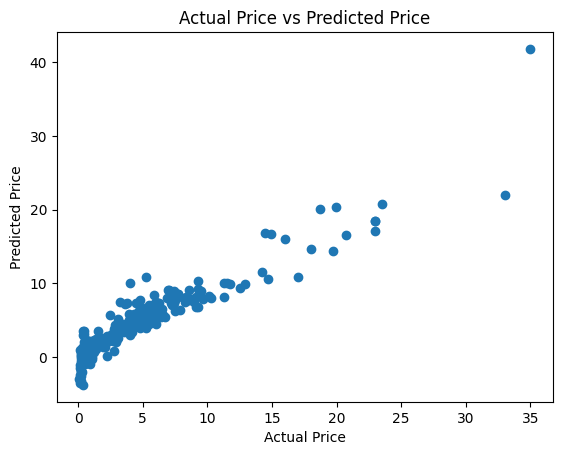

In [17]:
plt.scatter(y_train,Train_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [18]:
test_data = lin_reg.predict(x_test)

In [19]:
err_sc = metrics.r2_score(y_test,test_data)
print("R squared Error: ",err_sc)

R squared Error:  0.8365766715027051


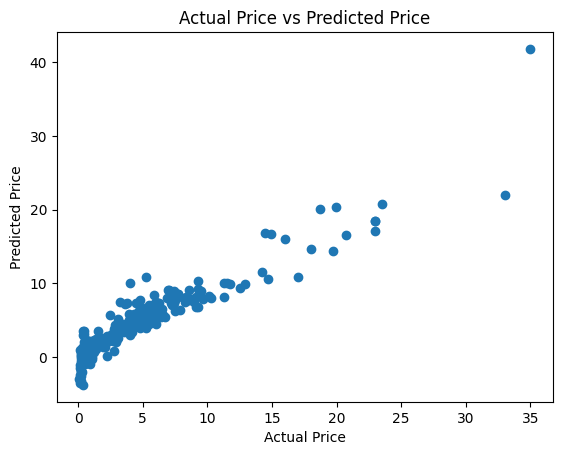

In [20]:
plt.scatter(y_train,Train_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [21]:
las = Lasso()

In [23]:
las.fit(x_train,y_train)

Lasso()

In [24]:
train_data = las.predict(x_train)

In [25]:
err = metrics.r2_score(y_train,train_data)
print("R squared Error: ",err)

R squared Error:  0.8427856123435794


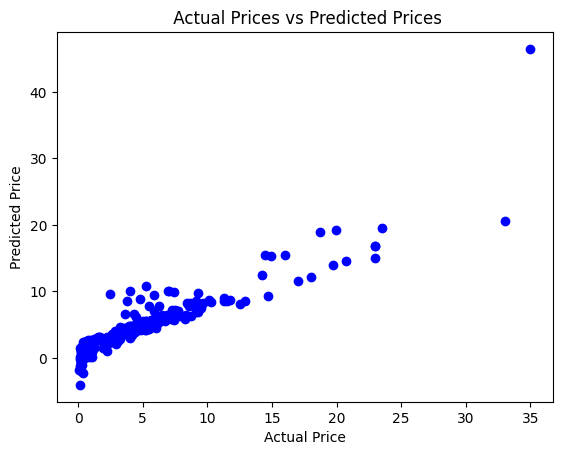

In [28]:
plt.scatter(y_train, train_data, color="blue", marker="o")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [30]:
test_data = las.predict(x_test)

In [31]:
err = metrics.r2_score(y_test,test_data)
print("R squared Error: ",err)

R squared Error:  0.8709167941173195


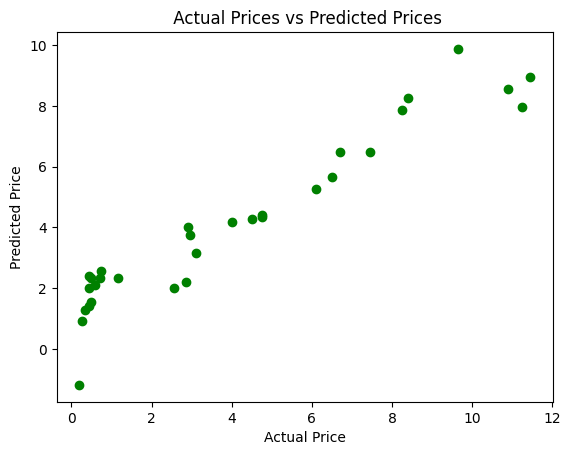

In [32]:
plt.scatter(y_test, test_data, color="Green", marker="o")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()